# Parsowanie plików
Procedura parsowania wygląda następująco
1. Patrzymy na plik z symulacji/pomiaru, sprawdzamy którą kolumnę i wiersze mamy wczytać
2. Następnie podajemy argumenty klasy processFile:
    a) arrname - nazwa tablicy w której będą dane
    b) filename  - nazwa pliku który otworzymy
    c) start - pierwszy wiersz jaki będzie wczytany
    d) end - ostatni wiersz jaki będzie wczytany
    e) col - numer kolumny która będzie wczytana
    f) dgb - flaga do debugowania (nie używać)
    g) magic_time - wyniki pomiarów z oscyloskopu mają nietypowy format np. wyglądają tak "17:53:58,785136", jeśli magic_time jest true pierwsza część jest ucinana a druga parsowana (ostatecznie otrzymamy tutaj "785136")
3. Kopiujemy tak uzyskane wyjścid do pola z kodem

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as ticker

def printArray(name,array):
    line = name
    line +=str("=np.array([")
    size = array.size
    for i in range(0, size-1):
        line +=str(str(array[i])+",")
    line += str(str(array[size-1])+"])")
    print(line)
    
def processFile(arrname, filename, start=0, end=10, col=0, dbg=False, magic_time=False, step=1):
    lineNo = 0
    res = []
    with open(filename) as infile:
        for line in infile:
            lineNo+=1
            if(lineNo>=start and lineNo<=end):
                array = line.split()
                if lineNo%step !=0:
                    continue
                if dbg:
                    print(array[col])
                try:
                    if magic_time:
                        temp = array[col]
                        temp = temp.split(',')
                        res.append(int(temp[1]))
                    else:
                        array[col] = array[col].replace(',',".")
                        res.append(float(array[col]))
                except Exception as error:
                    print(error)
                    pass
    
    nparr = np.array(res)
    if dbg:
        print(nparr)
        print("size ",nparr.size)
    return printArray(arrname, np.array(res))

In [70]:


def eval(someplot, y, col):
    X = np.array(someplot.get_children()[0].get_xdata())
    Y = np.array(someplot.get_children()[0].get_ydata())
    arr=[]
    arr.append(y)
    ev = np.interp(arr,X,Y)[0]
    someplot.axvline(y,color=col,linestyle="dotted")
    someplot.axhline(ev,color=col,linestyle="dotted")
    print(ev)
    return ev
    
    
    

# Inne użyteczne funkcje
Przy pomiarach zwisu/czasu narastania dobrze jest mieć dość dużą "rozdzielczość" obrazka i w razie czego skonfrontować wyniki naszego oszacowania "na oko" z tym co można otrzymać z danych numerycznych. Poniżej przykład jak można oszacować czas narastania.

In [34]:
#
processFile("time","bode3timesim10more.scp",start=20, end = 40000, step=1000,col =0)
processFile("ch1","bode3timesim10more.scp",start=20, end = 40000, step=1000,col =1)
processFile("ch2","bode3timesim10more.scp",start=20, end = 40000, step=1000,col =2)

time=np.array([0.0094231164,0.0190831164,0.0287431164,0.0384031164,0.0480631164,0.0577231164,0.06738311639999,0.07704311640001,0.08670311640001,0.09636311640001,0.1060231164,0.1156831164,0.1253431164,0.1350065628,0.1448331164,0.1544931164,0.1641531164,0.1738131164,0.1834731164,0.1931331164,0.2027931164,0.2124531164,0.2221131164,0.2317731164,0.2414331164,0.2510931164,0.2607531164,0.2704131164,0.2800731164,0.2899031164,0.2995631164,0.3092231164,0.3188831164,0.3285431164,0.3382031164,0.3478631164,0.3575231164,0.3671831164,0.3768431164,0.3865031164])
ch1=np.array([-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0])
ch2=np.array([-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-1.9998,-1.9976,-1.972,-1.6693,1.814,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.9999,1.9986,1.9832,1.8011,-0.35172,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.

20.0
0.32630117643693524


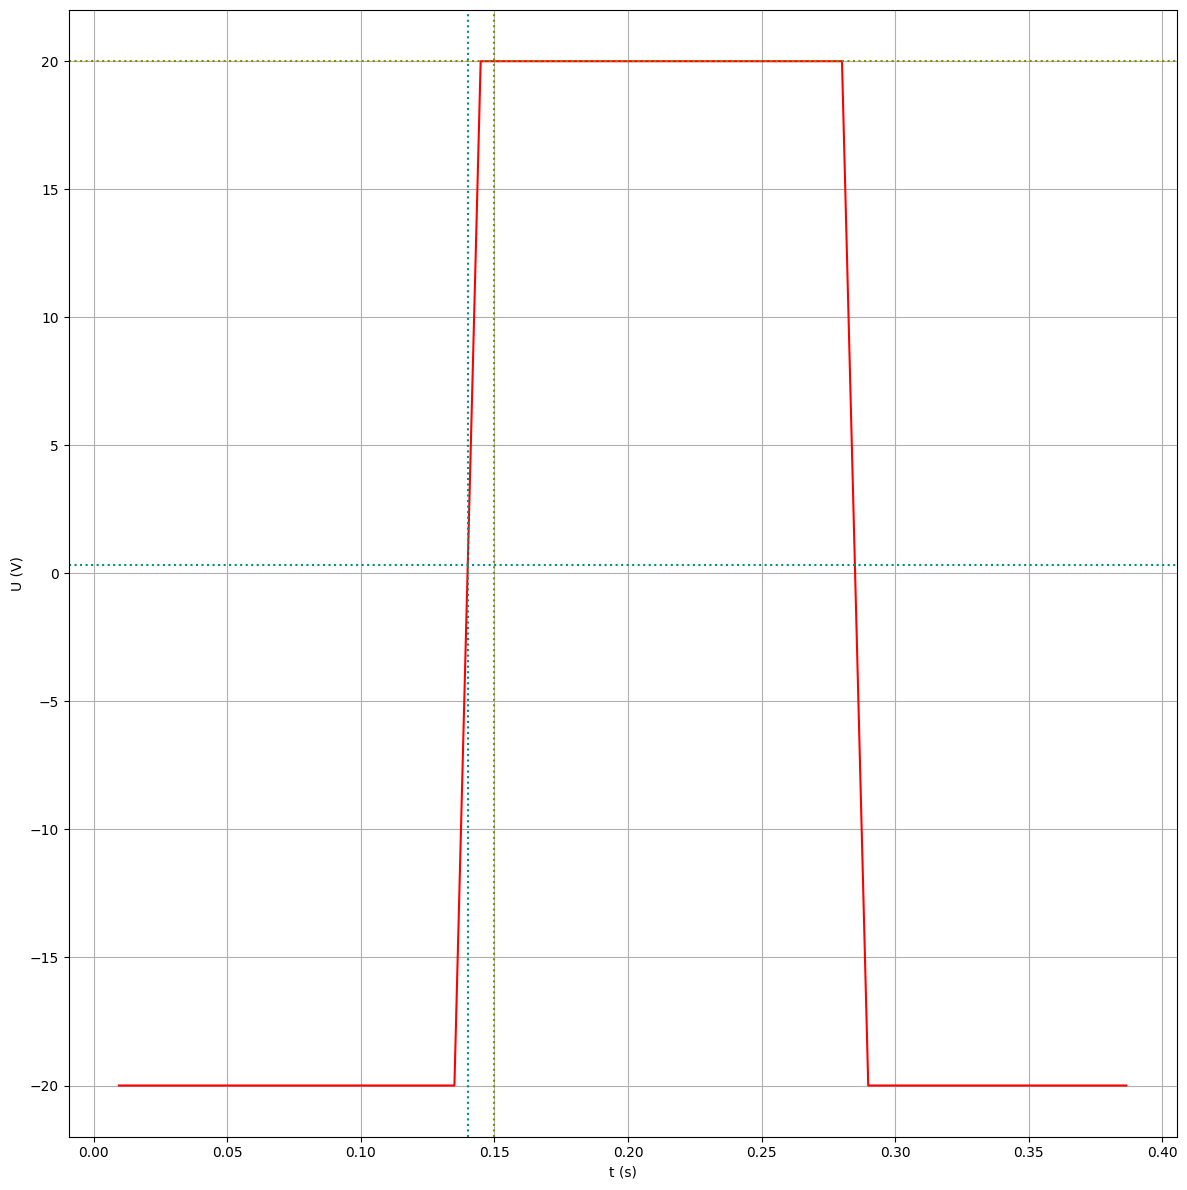

In [85]:
time=np.array([0.0094231164,0.0190831164,0.0287431164,0.0384031164,0.0480631164,0.0577231164,0.06738311639999,0.07704311640001,0.08670311640001,0.09636311640001,0.1060231164,0.1156831164,0.1253431164,0.1350065628,0.1448331164,0.1544931164,0.1641531164,0.1738131164,0.1834731164,0.1931331164,0.2027931164,0.2124531164,0.2221131164,0.2317731164,0.2414331164,0.2510931164,0.2607531164,0.2704131164,0.2800731164,0.2899031164,0.2995631164,0.3092231164,0.3188831164,0.3285431164,0.3382031164,0.3478631164,0.3575231164,0.3671831164,0.3768431164,0.3865031164])
ch1=np.array([-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0,-20.0])
ch2=np.array([-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-1.9998,-1.9976,-1.972,-1.6693,1.814,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.9999,1.9986,1.9832,1.8011,-0.35172,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-2.0,-1.9999])

fig, axes = plt.subplots(1,1)

axes.plot(time,ch1,"#ff0000")
axes.set_xlabel("t (s)")
axes.set_ylabel("U (V)")

eval(axes,0.15,"#808f00")
eval(axes,0.14,"#008f80")
axes.grid(True)
axes.grid(True)
fig.set_size_inches(12,12)
plt.tight_layout()
plt.show()